# DECLARAMOS LAS LIBRERIAS #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

In [2]:
warnings.filterwarnings('ignore')

# CARGAMOS LOS PRUEBAS QUE SON CORRECTAS #

In [3]:
df = pd.read_csv('experimental_data.csv')
df.shape

(10, 15)

In [4]:
X = df.iloc[:, 1:15] 

In [5]:
X.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,682.54,518.28,696.67,546.57,709.17,535.85,928.58,716.29,915.92,739.04,973.45,702.40,1073.42,824.69
1,641.26,583.49,670.88,591.67,676.28,573.60,890.68,669.90,803.73,690.07,865.35,808.97,909.23,886.37
2,707.53,558.40,745.78,540.54,735.86,570.17,934.01,687.43,956.67,718.37,1013.99,751.33,1024.18,891.69
3,700.31,584.17,661.71,606.90,717.17,594.54,811.61,680.59,936.10,771.09,963.66,795.07,1000.40,987.65
4,654.94,634.39,665.15,632.51,663.34,637.80,673.37,757.11,824.57,744.92,886.94,797.50,985.06,840.04


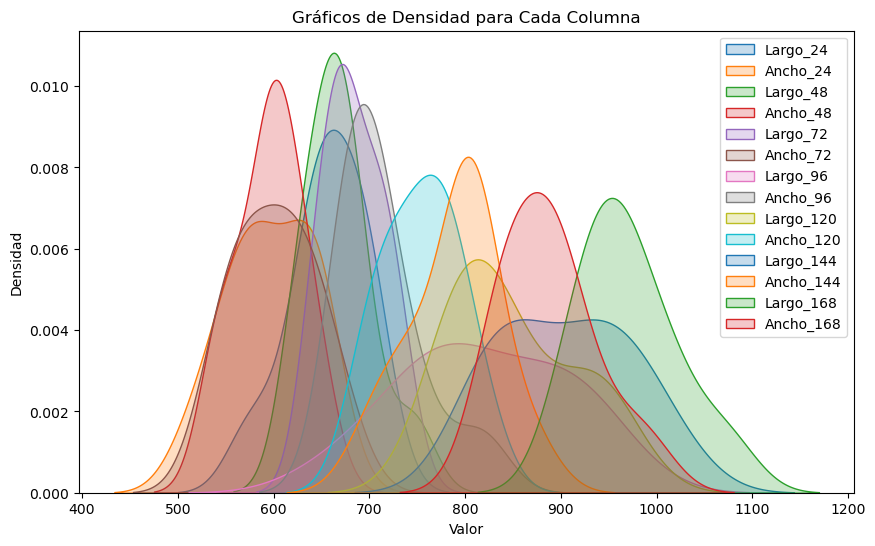

In [6]:
# Crear gráficos de densidad para cada columna
plt.figure(figsize=(10, 6))

for column in X.columns:
    sns.kdeplot(X[column], fill=True, label=column, bw_adjust=1)

plt.title('Gráficos de Densidad para Cada Columna')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# UTILIZAMOS KERNEL DENSITY

Para estimar la densidad de los datos y luego generar nuevas muestras a partir de esta densidad.

In [7]:
# Definir un rango de valores de bandwidth para buscar
params = {'bandwidth': np.linspace(0.1, 1.0, 30)}

#Definimos una semilla para no variar los valores en ejecuciones
np.random.seed(365)

# Crear el modelo KernelDensity
kde = KernelDensity(kernel='gaussian')

# Configurar la búsqueda en cuadrícula con CV(5 folds)
grid = GridSearchCV(kde, params, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
grid.fit(X)

# Evaluar el modelo utilizando el mejor bandwidth
kde_best = grid.best_estimator_

print("Mejor bandwidth encontrado:", grid.best_params_['bandwidth'])

Mejor bandwidth encontrado: 1.0


In [8]:
kde_best.fit(X)

new_samples = kde_best.sample(5)


df_new_samples = pd.DataFrame(new_samples, columns=X.columns)

df_new_samples.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,620.471713,597.000847,627.559960,593.191769,672.437787,612.847820,757.512077,722.113709,796.051334,792.475677,834.877491,815.810647,957.138555,852.442870
1,574.804504,649.050793,624.669361,602.127105,639.698928,615.217151,745.352340,709.417845,778.240200,766.878815,814.624263,798.243989,912.293822,853.037537
2,574.098173,651.028095,625.396911,600.899113,639.581232,613.815979,745.623986,705.906513,777.868338,767.326044,813.235698,796.868398,913.584253,853.249429
3,643.240574,640.918430,639.926003,615.044093,648.068055,645.703688,767.364979,687.879052,794.916104,781.833885,831.783818,814.942103,952.256690,891.720432
4,642.994736,641.053980,642.032009,616.049568,648.975242,644.002073,769.188196,688.688416,795.099301,783.135483,831.989834,815.393508,952.830834,890.692956


In [9]:
columns_largos = ['Largo_24','Largo_48','Largo_72','Largo_96','Largo_120', 'Largo_144', 'Largo_168']
columns_anchos = ['Ancho_24','Ancho_48','Ancho_72','Ancho_96','Ancho_120', 'Ancho_144', 'Ancho_168']

# CALCULAMOS LOS VALORES PARA CADA INTERVALO DE TIEMPO 

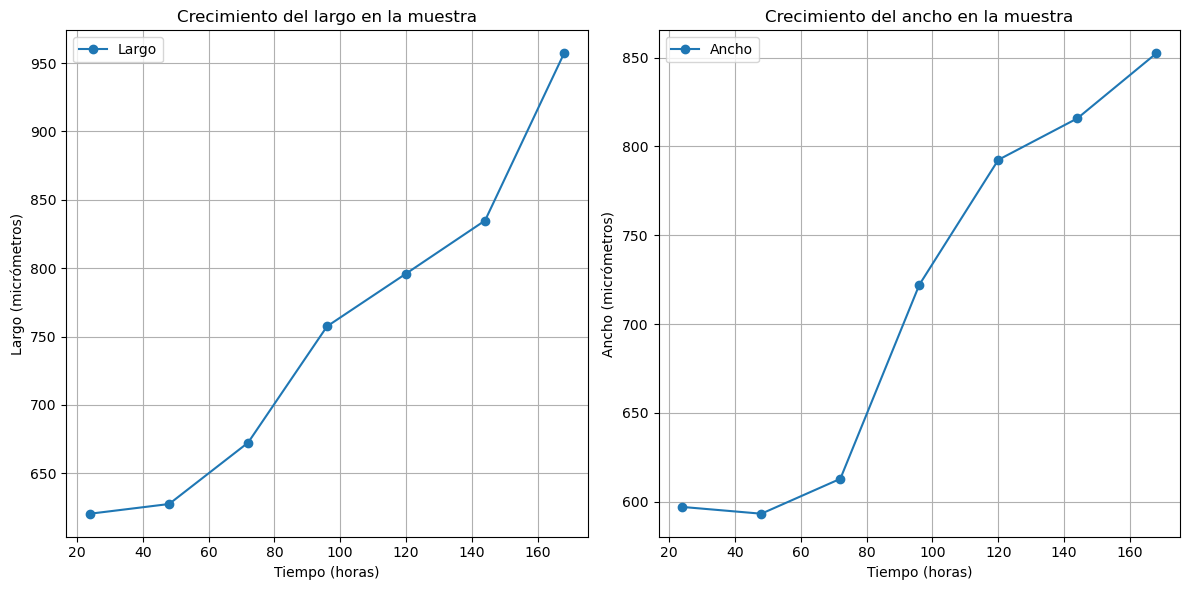

Tiempo: 24 horas -> Largo: 620.47 µm, Ancho: 597.00 µm
Tiempo: 48 horas -> Largo: 627.56 µm, Ancho: 593.19 µm
Tiempo: 72 horas -> Largo: 672.44 µm, Ancho: 612.85 µm
Tiempo: 96 horas -> Largo: 757.51 µm, Ancho: 722.11 µm
Tiempo: 120 horas -> Largo: 796.05 µm, Ancho: 792.48 µm
Tiempo: 144 horas -> Largo: 834.88 µm, Ancho: 815.81 µm
Tiempo: 168 horas -> Largo: 957.14 µm, Ancho: 852.44 µm


In [10]:
# Tiempos de medición (en horas)
tiempos = np.array([24, 48, 72, 96, 120, 144, 168])

#Obtenemos los valores de la primera muestra generada con Kernel
largos = df_new_samples[columns_largos].iloc[0].values
anchos = df_new_samples[columns_anchos].iloc[0].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para largos
plt.subplot(1, 2, 1)
plt.plot(tiempos, largos, 'o-', label='Largo')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Largo (micrómetros)')
plt.title('Crecimiento del largo en la muestra')
plt.legend()
plt.grid(True)

# Gráfico para anchos
plt.subplot(1, 2, 2)
plt.plot(tiempos, anchos, 'o-', label='Ancho')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Ancho (micrómetros)')
plt.title('Crecimiento del ancho en la muestra')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,largos, anchos)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")


# Volumenes de la muestra

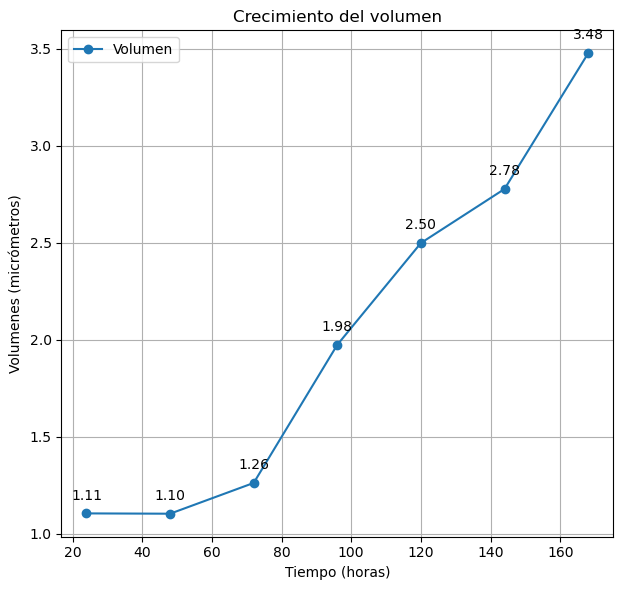

Hora: 24 -> Volumen: 1.1057116532877367
Hora: 48 -> Volumen: 1.104117932045354
Hora: 72 -> Volumen: 1.26277915906218
Hora: 96 -> Volumen: 1.9750165753208844
Hora: 120 -> Volumen: 2.4996716365028036
Hora: 144 -> Volumen: 2.7782510955247
Hora: 168 -> Volumen: 3.4775659946842996


In [11]:
volumenes = (0.5*anchos*anchos*largos)/100000000

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para volumen
plt.subplot(1, 2, 1)
plt.plot(tiempos, volumenes, 'o-', label='Volumen')
# Añadir etiquetas en cada punto
for i, (x, y) in enumerate(zip(tiempos, volumenes)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Volumenes (micrómetros)')
plt.title('Crecimiento del volumen')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

for i,v in enumerate(volumenes):
    print(f"Hora: {tiempos[i]} -> Volumen: {v}")

# DEFINIMOS LOS PARAMETROS PARA LAS GRÁFICAS

In [12]:
# Definir los parámetros de los esferoides
# Datos iniciales
c1 = largos[0] # Distancia desde el centro hasta el polo del primer esferoide(Largo)
a1 = anchos[0] # Semieje ecuatorial del primer esferoide(Ancho)

c2 = largos[6]# Distancia desde el centro hasta el polo del segundo esferoide(Largo)
a2 = anchos[6]# Semieje ecuatorial del segundo esferoide(Ancho)

In [13]:
# Crear valores para los ángulos phi y theta
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

In [14]:
# Calcular las coordenadas cartesianas de los dos esferoides
x1 = a1 * np.outer(np.cos(phi), np.sin(theta))
y1 = a1 * np.outer(np.sin(phi), np.sin(theta))
z1 = c1 * np.outer(np.ones(np.size(phi)), np.cos(theta))

x2 = a2 * np.outer(np.cos(phi), np.sin(theta))
y2 = a2 * np.outer(np.sin(phi), np.sin(theta))
z2 = c2 * np.outer(np.ones(np.size(phi)), np.cos(theta))

# GRAFICO UNO SOBRE OTRO

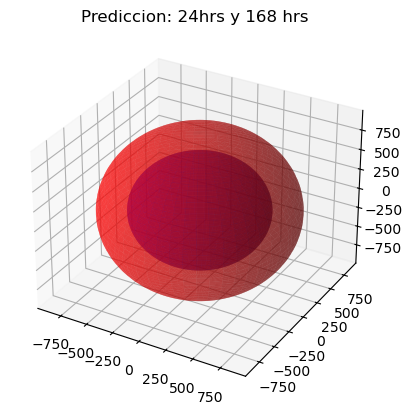

In [15]:
# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los dos esferoides
ax.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='r', alpha=0.5)

# Ajustar la relación de aspecto de los ejes
ax.set_aspect('auto')
ax.set_title('Prediccion: 24hrs y 168 hrs')

# Mostrar el gráfico
plt.show()


# GRAFICO INICIO-FINAL

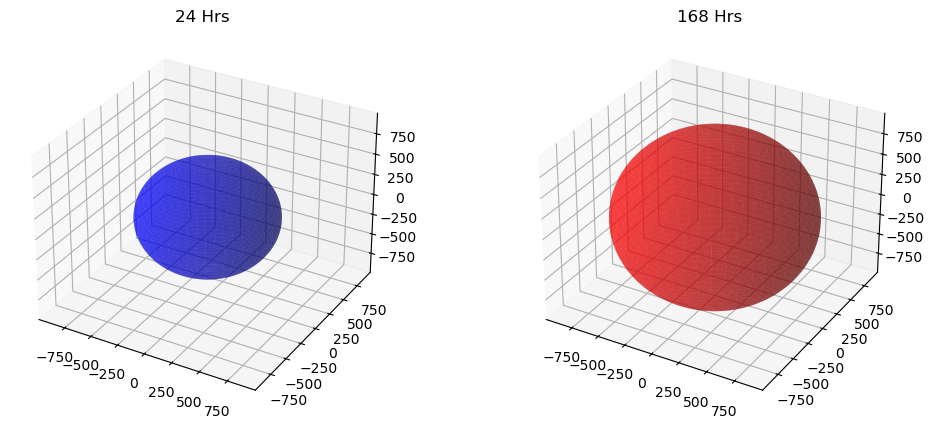

In [16]:
#Encontrar limites inferiores y maximos
max_lim = max(np.max(x1), np.max(y1), np.max(z1), np.max(x2), np.max(y2), np.max(z2))
min_lim = min(np.min(x1), np.min(y1), np.min(z1), np.min(x2), np.min(y2), np.min(z2))

# Crear las figuras y los ejes 3D
fig = plt.figure(figsize=(12, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax1.set_title('24 Hrs')
ax1.set_xlim(min_lim, max_lim)
ax1.set_ylim(min_lim, max_lim)
ax1.set_zlim(min_lim, max_lim)


# Subgráfico 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x2, y2, z2, color='r', alpha=0.5)
ax2.set_title('168 Hrs')
ax2.set_xlim(min_lim, max_lim)
ax2.set_ylim(min_lim, max_lim)
ax2.set_zlim(min_lim, max_lim)

# Mostrar los gráficos
plt.show()

# GRAFICA DE INTERPOLADO 24-168hrs

En el análisis numérico, se denomina interpolación a obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos.

In [17]:
# tiempos = np.array([24, 168])  # tiempos en horas
# medidas_1 = np.array([a1, c1])  # largo 1 en micrómetros
# medidas_2 = np.array([a2, c2])  # largo 2 en micrómetros

# # Interpolación lineal para encontrar largos intermedios
# tiempos_intermedios = np.array([24, 48, 72, 96, 120, 144, 168])  # tiempos intermedios

# # Funciones de interpolación lineal
# interp_medidas_1 = np.interp(tiempos_intermedios, tiempos, medidas_1)
# interp_medidas_2 = np.interp(tiempos_intermedios, tiempos, medidas_2)

# # Graficar los resultados
# plt.figure(figsize=(10, 6))
# plt.plot(tiempos, medidas_1, 'o', label='24hrs')
# plt.plot(tiempos, medidas_2, 'o', label='168hrs')
# plt.plot(tiempos_intermedios, interp_medidas_1, '-', label='24hrs interpolado')
# plt.plot(tiempos_intermedios, interp_medidas_2, '-', label='168hrs interpolado')
# plt.xlabel('Tiempo (horas)')
# plt.ylabel('Medidas (micrómetros)')
# plt.title('Crecimiento de esteroides en la muestra')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Mostrar resultados
# for dimensiones in list(zip(tiempos,interp_medidas_1, interp_medidas_2)):
#     tiempo, largo, ancho = dimensiones
#     print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")
    

## Animated

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [19]:
# Crear la ventana principal
root = tk.Tk()
root.title("Animacion crecimiento de 24 a 168 hrs")

# Crear la figura y el eje 3D
fig = plt.Figure()
ax = fig.add_subplot(111, projection='3d')

# Definir los parámetros para las 7 esferas
params = [
    {'t':24, 'c': largos[0], 'a': anchos[0]},
    {'t':48,'c': largos[1], 'a': anchos[1]},
    {'t':72,'c': largos[2], 'a': anchos[2]},
    {'t':96,'c': largos[3], 'a': anchos[3]},
    {'t':120,'c': largos[4], 'a': anchos[4]},
    {'t':144,'c': largos[5], 'a': anchos[5]},
    {'t':168,'c': largos[6], 'a': anchos[6]}
]

# Crear una esfera que representa la célula del asteroide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Índice de la esfera actual
current_index = 0

# Crear una etiqueta con instrucciones
instructions = tk.Label(root, text=f"""""")
instructions.pack(side=tk.BOTTOM, fill=tk.X)


# Función para dibujar la esfera actual
def draw_sphere(index):
    ax.clear()
    ax.set_xlim(-1200, 1200)
    ax.set_ylim(-1200, 1200)
    ax.set_zlim(-1200, 1200)
    
    # Obtener parámetros para la esfera actual
    c = params[index]['c']
    a = params[index]['a']
    t = params[index]['t']
    
    # Calcular las coordenadas de la esfera
    x_scaled = a * x
    y_scaled = a * y
    z_scaled = c * z
    
    # Dibujar la esfera
    selected_color = tk.StringVar(value='yellow')
    ax.plot_surface(x_scaled, y_scaled, z_scaled, color=selected_color.get(), alpha=0.6)
    
    # Ajustar el ángulo de visión
    ax.view_init(elev=20., azim=30)
    
    # Actualizar el canvas de tkinter
    canvas.draw()
    
    instructions.config(text=f"""Muestra a la hora: {t} hrs
    \nAncho: {a:.2f}, Largo: {c:.2f}
    \nVolumen((4/3)pi*(a^2)*c): {(0.5)*a*a*c:.2f}
    \nVolumen2.0(Volumen/10^7): {(0.5*a*a*c)/100000000}
    \nUsa la flecha derecha para mostrar el siguiente crecimiento
    \nUsa la flecha izquierda para mostrar el crecimiento anterior""")

# Función para manejar eventos de teclado
def on_key_press(event):
    global current_index
    global hora
    if event.keysym == 'Right':
        current_index = (current_index + 1) % len(params)
        draw_sphere(current_index)
    elif event.keysym == 'Left':
        current_index = (current_index - 1) % len(params)
        draw_sphere(current_index)

# Crear un widget de canvas para incluir la figura en la ventana de tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Asignar la función de manejo de eventos de teclado
root.bind('<KeyPress>', on_key_press)

# Función para cerrar la ventana
def on_closing():
    root.quit()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)

# Inicializar la primera esfera
draw_sphere(current_index)

# Iniciar el loop de la ventana
tk.mainloop()

In [69]:
# Crear la ventana principal
root = tk.Tk()
root.title("Animación crecimiento de 24 a 168 hrs")

# Crear la figura y el eje 3D
fig = plt.Figure()
ax = fig.add_subplot(111, projection='3d')

# Definir los parámetros para las 7 esferas
params = [
    {'t': 24, 'c': largos[0], 'a': anchos[0]},
    {'t': 48, 'c': largos[1], 'a': anchos[1]},
    {'t': 72, 'c': largos[2], 'a': anchos[2]},
    {'t': 96, 'c': largos[3], 'a': anchos[3]},
    {'t': 120, 'c': largos[4], 'a': anchos[4]},
    {'t': 144, 'c': largos[5], 'a': anchos[5]},
    {'t': 168, 'c': largos[6], 'a': anchos[6]}
]

# Crear una esfera que representa la célula del asteroide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Índice de la esfera actual
current_index = 0

# Crear una etiqueta con instrucciones
instructions = tk.Label(root, text="")
instructions.pack(side=tk.BOTTOM, fill=tk.X)

# Crear una etiqueta para mostrar el número de la esfera actual
number_label = tk.Label(root, text="Estado: 1/7")
number_label.pack(side=tk.BOTTOM, fill=tk.X)

# Crear un widget de canvas para incluir la figura en la ventana de tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Inicializar posiciones aleatorias para las células internas
def initialize_cells(num_cells):
    cell_colors = np.array(['black'] * (num_cells // 3) + ['orange'] * (num_cells // 3) + ['blue'] * (num_cells - 2 * (num_cells // 3)))
    np.random.seed(42)  # Para reproducibilidad
    theta_initial = np.random.rand(num_cells) * 2 * np.pi
    phi_initial = np.random.rand(num_cells) * np.pi
    r_initial = np.random.rand(num_cells) * 1000  # Esferas iniciales esparcidas
    x_cells_initial = r_initial * np.sin(phi_initial) * np.cos(theta_initial)
    y_cells_initial = r_initial * np.sin(phi_initial) * np.sin(theta_initial)
    z_cells_initial = r_initial * np.cos(phi_initial)
    return cell_colors, x_cells_initial, y_cells_initial, z_cells_initial

# Función para dibujar la esfera actual con las células internas
def draw_sphere(index):
    ax.clear()
    ax.set_xlim(-1200, 1200)
    ax.set_ylim(-1200, 1200)
    ax.set_zlim(-1200, 1200)
    
    # Obtener parámetros para la esfera actual
    c = params[index]['c']
    a = params[index]['a']
    t = params[index]['t']
    
    # Calcular las coordenadas de la esfera
    x_scaled = a * x
    y_scaled = a * y
    z_scaled = c * z
    
    # Dibujar solo el contorno de la esfera principal con baja opacidad
    ax.plot_wireframe(x_scaled, y_scaled, z_scaled, color='purple', alpha=0.05)
    
    # Inicializar el número de células basado en el tiempo
    num_cells = 15 + 15 * index  # 15, 30, 45, 60, 75, 90, 105
    cell_colors, x_cells_initial, y_cells_initial, z_cells_initial = initialize_cells(num_cells)
    
    # Crear un array para las posiciones de las células ajustadas
    r_cells = np.copy(np.linalg.norm(np.column_stack((x_cells_initial, y_cells_initial, z_cells_initial)), axis=1))
    
    # Factor de reordenación de las posiciones de las células según el tiempo
    scale_factor = (t - 24) / (168 - 24)
    
    # Reordenar posiciones de las células según el tiempo
    for i, color in enumerate(cell_colors):
        if color == 'black':
            r_cells[i] = np.interp(scale_factor, [0, 1], [1000, 0.1 * a])
        elif color == 'orange':
            r_cells[i] = np.interp(scale_factor, [0, 1], [1000, 0.5 * a])
        elif color == 'blue':
            r_cells[i] = np.interp(scale_factor, [0, 1], [1000, a])
    
    # Asegurarse de que las células permanezcan dentro de la esfera principal
    r_cells = np.clip(r_cells, 0, a)  # Limitar el radio al tamaño de la esfera principal
    
    # Generar posiciones actualizadas para las células
    theta_cells = np.arctan2(y_cells_initial, x_cells_initial)
    phi_cells = np.arccos(np.clip(z_cells_initial / np.clip(r_cells, 1e-10, None), -1, 1))  # Para evitar valores fuera del rango
    x_cells = r_cells * np.sin(phi_cells) * np.cos(theta_cells)
    y_cells = r_cells * np.sin(phi_cells) * np.sin(theta_cells)
    z_cells = r_cells * np.cos(phi_cells)
    
    # Dibujar las células internas dentro de la esfera correspondiente
    ax.scatter(x_cells, y_cells, z_cells, color=cell_colors, s=15)
    
    # Ajustar el ángulo de visión
    ax.view_init(elev=20., azim=30)
    
    # Actualizar el canvas de tkinter
    canvas.draw()
    
    # Actualizar el texto con el estado actual
    instructions.config(text=f"""Muestra a la hora: {t} hrs
    \nAncho: {a:.3f}, Largo: {c:.3f}
    \nVolumen((4/3)pi*(a^2)*c): {(0.5)*a*a*c:.3f}
    \nVolumen2.0(Volumen/10^7): {(0.5*a*a*c)/100000000:.3f}
    \nUsa la flecha derecha para mostrar el siguiente crecimiento
    \nUsa la flecha izquierda para mostrar el crecimiento anterior""")
    number_label.config(text=f"Estado: {index + 1}/7")

# Función para manejar eventos de teclado
def on_key_press(event):
    global current_index
    if event.keysym == 'Right':
        current_index = (current_index + 1) % len(params)
        draw_sphere(current_index)
    elif event.keysym == 'Left':
        current_index = (current_index - 1) % len(params)
        draw_sphere(current_index)

# Asignar la función de manejo de eventos de teclado
root.bind('<KeyPress>', on_key_press)

# Función para cerrar la ventana
def on_closing():
    root.quit()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)

# Inicializar la primera esfera
draw_sphere(current_index)

# Iniciar el loop de la ventana
tk.mainloop()

In [70]:
# Crear la ventana principal
root = tk.Tk()
root.title("Animación crecimiento de 24 a 168 hrs")

# Crear la figura y el eje 3D
fig = plt.Figure()
ax = fig.add_subplot(111, projection='3d')

# Definir los parámetros para las 7 esferas
params = [
    {'t': 24, 'c': largos[0], 'a': anchos[0]},
    {'t': 48, 'c': largos[1], 'a': anchos[1]},
    {'t': 72, 'c': largos[2], 'a': anchos[2]},
    {'t': 96, 'c': largos[3], 'a': anchos[3]},
    {'t': 120, 'c': largos[4], 'a': anchos[4]},
    {'t': 144, 'c': largos[5], 'a': anchos[5]},
    {'t': 168, 'c': largos[6], 'a': anchos[6]}
]

# Crear una esfera que representa la célula del asteroide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Índice de la esfera actual
current_index = 0

# Crear una etiqueta con instrucciones
instructions = tk.Label(root, text="")
instructions.pack(side=tk.BOTTOM, fill=tk.X)

# Crear una etiqueta para mostrar el número de la esfera actual
number_label = tk.Label(root, text="Estado: 1/7")
number_label.pack(side=tk.BOTTOM, fill=tk.X)

# Crear un widget de canvas para incluir la figura en la ventana de tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Inicializar posiciones aleatorias para las células internas
def initialize_cells(num_cells):
    cell_colors = np.array(['black'] * (num_cells // 3) + ['orange'] * (num_cells // 3) + ['blue'] * (num_cells - 2 * (num_cells // 3)))
    np.random.seed(42)  # Para reproducibilidad
    theta_initial = np.random.rand(num_cells) * 2 * np.pi
    phi_initial = np.random.rand(num_cells) * np.pi
    r_initial = np.random.rand(num_cells) * 1000  # Esferas iniciales esparcidas
    x_cells_initial = r_initial * np.sin(phi_initial) * np.cos(theta_initial)
    y_cells_initial = r_initial * np.sin(phi_initial) * np.sin(theta_initial)
    z_cells_initial = r_initial * np.cos(phi_initial)
    return cell_colors, x_cells_initial, y_cells_initial, z_cells_initial

def draw_sphere(index):
    ax.clear()
    ax.set_xlim(-1200, 1200)
    ax.set_ylim(-1200, 1200)
    ax.set_zlim(-1200, 1200)
    
    # Obtener parámetros para la esfera actual
    c = params[index]['c']
    a = params[index]['a']
    t = params[index]['t']
    
    # Calcular las coordenadas de la esfera principal
    x_scaled = a * x
    y_scaled = a * y
    z_scaled = c * z
    
    # Dibujar solo el contorno de la esfera principal con baja opacidad
    ax.plot_wireframe(x_scaled, y_scaled, z_scaled, color='yellow', alpha=0.1)
    
    # Inicializar el número de células basado en el tiempo
    num_cells = 15 + 15 * index  # 15, 30, 45, 60, 75, 90, 105
    cell_colors, x_cells_initial, y_cells_initial, z_cells_initial = initialize_cells(num_cells)
    
    # Crear un array para las posiciones de las células ajustadas
    r_cells = np.copy(np.linalg.norm(np.column_stack((x_cells_initial, y_cells_initial, z_cells_initial)), axis=1))
    
    # Factor de reordenación de las posiciones de las células según el tiempo
    scale_factor = (t - 24) / (168 - 24)
    
    # Reordenar posiciones de las células según el tiempo y su color
    for i, color in enumerate(cell_colors):
        if color == 'gray':
            # Grises hacia el centro
            r_cells[i] = np.interp(scale_factor, [0, 1], [1200, 0.2 * a])
        elif color == 'orange':
            # Naranjas entre grises y azules
            r_cells[i] = np.interp(scale_factor, [0, 1], [1200, 0.6 * a])
        elif color == 'blue':
            # Azules hacia el exterior
            r_cells[i] = np.interp(scale_factor, [0, 1], [1200, a])
    
    # Asegurarse de que las células permanezcan dentro de la esfera principal
    r_cells = np.clip(r_cells, 0, a)  # Limitar el radio al tamaño de la esfera principal
    
    # Generar posiciones actualizadas para las células
    theta_cells = np.arctan2(y_cells_initial, x_cells_initial)
    phi_cells = np.arccos(np.clip(z_cells_initial / np.clip(r_cells, 1e-10, None), -1, 1))  # Para evitar valores fuera del rango
    
    # Parámetros para la forma elipsoidal de las minicélulas
    elongation_factor_x = 1.5  # Alarga en el eje x
    elongation_factor_y = 0.5  # Contrae en el eje y
    elongation_factor_z = 1.0  # Alarga en el eje z

    # Función para crear esferas alargadas
    def create_elongated_sphere(x_center, y_center, z_center, elongation_factors, size):
        u = np.linspace(0, 2 * np.pi, 20)
        v = np.linspace(0, np.pi, 10)
        x = size * elongation_factors[0] * np.outer(np.cos(u), np.sin(v)) + x_center
        y = size * elongation_factors[1] * np.outer(np.sin(u), np.sin(v)) + y_center
        z = size * elongation_factors[2] * np.outer(np.ones(np.size(u)), np.cos(v)) + z_center
        return x, y, z

    # Dibujar las células internas con forma elipsoidal dentro de la esfera correspondiente
    for i in range(num_cells):
        x_center = r_cells[i] * np.sin(phi_cells[i]) * np.cos(theta_cells[i])
        y_center = r_cells[i] * np.sin(phi_cells[i]) * np.sin(theta_cells[i])
        z_center = r_cells[i] * np.cos(phi_cells[i])
        
        # Cambia el tamaño de las células aquí para hacerlas más grandes
        cell_size = 2000  # Aumenta el tamaño; prueba con valores más grandes para ajustar más si es necesario
        
        # Crear y dibujar la minicélula alargada usando plot_wireframe
        x_cell, y_cell, z_cell = create_elongated_sphere(x_center, y_center, z_center,
                                                        (elongation_factor_x, elongation_factor_y, elongation_factor_z), 
                                                        cell_size / 100)
        # Dibujar el contorno de las minicélulas
        ax.plot_wireframe(x_cell, y_cell, z_cell, color=cell_colors[i], alpha=0.6)

    # Ajustar el ángulo de visión
    ax.view_init(elev=20., azim=30)
    
    # Actualizar el canvas de tkinter
    canvas.draw()
    
    # Actualizar el texto con el estado actual
    instructions.config(text=f"""Muestra a la hora: {t} hrs
    \nAncho: {a:.2f}, Largo: {c:.2f}
    \nVolumen((4/3)pi*(a^2)*c): {(0.5)*a*a*c:.2f}
    \nVolumen2.0(Volumen/10^7): {(0.5*a*a*c)/100000000}
    \nUsa la flecha derecha para mostrar el siguiente crecimiento
    \nUsa la flecha izquierda para mostrar el crecimiento anterior""")
    number_label.config(text=f"Estado: {index + 1}/7")


# Función para manejar eventos de teclado
def on_key_press(event):
    global current_index
    if event.keysym == 'Right':
        current_index = (current_index + 1) % len(params)
        draw_sphere(current_index)
    elif event.keysym == 'Left':
        current_index = (current_index - 1) % len(params)
        draw_sphere(current_index)

# Asignar la función de manejo de eventos de teclado
root.bind('<KeyPress>', on_key_press)

# Función para cerrar la ventana
def on_closing():
    root.quit()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)

# Inicializar la primera esfera
draw_sphere(current_index)

# Iniciar el loop de la ventana
tk.mainloop()

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# Crear la ventana principal
root = tk.Tk()
root.title("Animacion crecimiento de 24 a 168 hrs")

# Crear la figura y el eje 3D
fig = plt.Figure()
ax = fig.add_subplot(111, projection='3d')

# Definir los parámetros para las 7 esferas
params = [
    {'t':24, 'c': 708.10, 'a': 557.49},
    {'t':48,'c': 745.76, 'a': 539.58},
    {'t':72,'c': 735.60, 'a': 568.99},
    {'t':96,'c': 934.21, 'a': 687.36},
    {'t':120,'c': 954.78, 'a': 719.51},
    {'t':144,'c': 1014.34, 'a': 751.61},
    {'t':168,'c': 1024.34, 'a': 892.08}
]

# Crear una esfera que representa la célula del asteroide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Índice de la esfera actual
current_index = 0

# Crear una etiqueta con instrucciones
instructions = tk.Label(root, text="")
instructions.pack(side=tk.BOTTOM, fill=tk.X)
number_label = tk.Label(root, text="")
number_label.pack(side=tk.BOTTOM, fill=tk.X)
# Función para inicializar las minicélulas
def initialize_cells(num_cells):
    if num_cells <= 15:
        num_blue = num_cells
        num_orange = 0
        num_gray = 0
    elif num_cells <= 30:
        num_blue = min(num_cells, 20)
        num_orange = max(num_cells - num_blue, 0)
        num_gray = 0
    elif num_cells <= 45:
        num_blue = min(num_cells, 30)
        num_orange = min(num_cells - num_blue, 20)
        num_gray = max(num_cells - num_blue - num_orange, 0)
    elif num_cells <= 60:
        num_blue = min(num_cells, 40)
        num_orange = min(num_cells - num_blue, 25)
        num_gray = max(num_cells - num_blue - num_orange, 0)
    elif num_cells <= 75:
        num_blue = min(num_cells, 50)
        num_orange = min(num_cells - num_blue, 30)
        num_gray = max(num_cells - num_blue - num_orange, 0)
    elif num_cells <= 90:
        num_blue = min(num_cells, 60)
        num_orange = min(num_cells - num_blue, 35)
        num_gray = max(num_cells - num_blue - num_orange, 0)
    elif num_cells <= 105:
        num_blue = min(num_cells, 70)
        num_orange = min(num_cells - num_blue, 40)
        num_gray = max(num_cells - num_blue - num_orange, 0)

    # Asegurarse de que siempre haya al menos 5 esferas naranjas más que grises
    num_gray = max(num_gray, num_orange - 5)
    num_orange = max(num_orange, num_gray + 5)

    # Recalcular el número de esferas azules
    num_blue = num_cells - num_orange - num_gray
    num_blue = max(num_blue, 0)

    cell_colors = (['blue'] * num_blue +
                   ['orange'] * num_orange +
                   ['gray'] * num_gray)
    
    np.random.shuffle(cell_colors)  # Mezclar colores
    theta_cells = np.random.uniform(0, 2 * np.pi, num_cells)
    phi_cells = np.random.uniform(0, np.pi, num_cells)
    r_cells_initial = np.random.uniform(0, 1, num_cells)  # Inicialmente esparcidos
    return cell_colors, theta_cells, phi_cells, r_cells_initial

# Función para crear esferas alargadas
def create_elongated_sphere(x_center, y_center, z_center, elongation_factors, size):
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 10)
    x = size * elongation_factors[0] * np.outer(np.cos(u), np.sin(v)) + x_center
    y = size * elongation_factors[1] * np.outer(np.sin(u), np.sin(v)) + y_center
    z = size * elongation_factors[2] * np.outer(np.ones(np.size(u)), np.cos(v)) + z_center
    return x, y, z

# Función para dibujar la esfera actual
def draw_sphere(index):
    ax.clear()
    ax.set_xlim(-1200, 1200)
    ax.set_ylim(-1200, 1200)
    ax.set_zlim(-1200, 1200)
    
    # Obtener parámetros para la esfera actual
    c = params[index]['c']
    a = params[index]['a']
    t = params[index]['t']
    
    # Calcular las coordenadas de la esfera principal
    x_scaled = a * x
    y_scaled = a * y
    z_scaled = c * z
    
    # Dibujar solo el contorno de la esfera principal con baja opacidad
    ax.plot_wireframe(x_scaled, y_scaled, z_scaled, color='yellow', alpha=0.1)
    
    # Inicializar el número de células basado en el tiempo
    num_cells = 15 + 15 * index  # 15, 30, 45, 60, 75, 90, 105
    cell_colors, theta_cells, phi_cells, r_cells_initial = initialize_cells(num_cells)
    
    # Inicializar las posiciones de las células
    x_cells = r_cells_initial * np.sin(phi_cells) * np.cos(theta_cells)
    y_cells = r_cells_initial * np.sin(phi_cells) * np.sin(theta_cells)
    z_cells = r_cells_initial * np.cos(phi_cells)
    
    # Parámetros para la forma elipsoidal de las minicélulas
    elongation_factor_x = 1.5  # Alarga en el eje x
    elongation_factor_y = 0.5  # Contrae en el eje y
    elongation_factor_z = 1.0  # Alarga en el eje z
    cell_size = 2500  # Tamaño de las células
    
    # Reordenar posiciones de las células según el tiempo y su color
    r_cells_final = np.linalg.norm(np.column_stack((x_cells, y_cells, z_cells)), axis=1)
    scale_factor = (t - 24) / (168 - 24)
    
    # Asegurarse de que las células permanezcan dentro de la esfera principal
    for i, color in enumerate(cell_colors):
        if color == 'gray':
            # Grises hacia el centro
            r_cells_final[i] = np.interp(scale_factor, [0, 1], [a * 0.2, 0.2 * a])
        elif color == 'orange':
            # Naranjas entre grises y azules
            r_cells_final[i] = np.interp(scale_factor, [0, 1], [a * 0.6, 0.6 * a])
        elif color == 'blue':
            # Azules hacia el exterior
            r_cells_final[i] = np.interp(scale_factor, [0, 1], [a, a])
    
    r_cells_final = np.clip(r_cells_final, 0, a)  # Limitar el radio al tamaño de la esfera principal
    
    # Actualizar posiciones para las células
    x_cells = r_cells_final * np.sin(phi_cells) * np.cos(theta_cells)
    y_cells = r_cells_final * np.sin(phi_cells) * np.sin(theta_cells)
    z_cells = r_cells_final * np.cos(phi_cells)
    
    # Dibujar las células internas con forma elipsoidal dentro de la esfera correspondiente
    for i in range(num_cells):
        x_center = x_cells[i]
        y_center = y_cells[i]
        z_center = z_cells[i]
        
        # Crear y dibujar la minicélula alargada usando plot_wireframe
        x_cell, y_cell, z_cell = create_elongated_sphere(x_center, y_center, z_center,
                                                        (elongation_factor_x, elongation_factor_y, elongation_factor_z), 
                                                        cell_size / 100)
        # Dibujar el contorno de las minicélulas
        ax.plot_wireframe(x_cell, y_cell, z_cell, color=cell_colors[i], alpha=0.6)

    # Ajustar el ángulo de visión
    ax.view_init(elev=20., azim=30)
    
    # Actualizar el canvas de tkinter
    canvas.draw()
    
    # Actualizar el texto con el estado actual
    instructions.config(text=f"""Muestra a la hora: {t} hrs
    \nAncho: {a:.2f}, Largo: {c:.2f}
    \nVolumen((4/3)pi*(a^2)*c): {(0.5)*a*a*c:.2f}
    \nVolumen2.0(Volumen/10^7): {(0.5*a*a*c)/100000000}
    \nUsa la flecha derecha para mostrar el siguiente crecimiento
    \nUsa la flecha izquierda para mostrar el crecimiento anterior""")
    number_label.config(text=f"Estado: {index + 1}/7")

# Función para manejar las teclas de flecha
def on_key(event):
    global current_index
    if event.keysym == 'Right':
        current_index = (current_index + 1) % len(params)
    elif event.keysym == 'Left':
        current_index = (current_index - 1) % len(params)
    draw_sphere(current_index)

# Crear el canvas de Matplotlib y agregarlo a la ventana Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Llamar a la función para dibujar la esfera inicial
draw_sphere(current_index)

# Conectar la función de manejo de teclas
root.bind('<Key>', on_key)

# Iniciar el bucle de eventos de Tkinter
root.mainloop()
